In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np 
import tensorflow
os.getcwd()

def get_tickers():
    os.chdir(os.path.abspath(os.path.join("../data/tickers/ticker_data/_Rolling")))
    t = os.listdir()
    return t
    
t = get_tickers()

In [4]:
t

['MA_AIZP.csv',
 'MA_ARD.csv',
 'MA_BAP.csv',
 'MA_BC.csv',
 'MA_BML-P-L.csv',
 'MA_C-P-K.csv',
 'MA_CLNS-P-E.csv',
 'MA_CXE.csv',
 'MA_EMR.csv',
 'MA_FBR.csv',
 'MA_FSK.csv',
 'MA_FUN.csv',
 'MA_GNC.csv',
 'MA_GNE-P-A.csv',
 'MA_HIG.csv',
 'MA_IHC.csv',
 'MA_JCI.csv',
 'MA_JP.csv',
 'MA_KMPA.csv',
 'MA_LSI.csv',
 'MA_NLY-P-H.csv',
 'MA_PFL.csv',
 'MA_PSA-P-U.csv',
 'MA_SERV.csv',
 'MA_SMTA.csv',
 'MA_TRV.csv',
 'MA_VRS.csv',
 'MA_WMC.csv',
 'MA_WU.csv']

In [8]:
tickers = [tick for tick in t if "I" in tick]
tickers

['MA_AIZP.csv', 'MA_HIG.csv', 'MA_IHC.csv', 'MA_JCI.csv', 'MA_LSI.csv']

In [21]:
aizp = pd.read_csv(tickers[0], header=0)
hig = pd.read_csv(tickers[1], header=0)
ihc = pd.read_csv(tickers[2], header=0)
jci = pd.read_csv(tickers[3], header=0)
lsi = pd.read_csv(tickers[4], header=0)

open_data = pd.DataFrame()
open_data["aizp_open"] = aizp["open"]
open_data["hig_open"] = hig["open"] 
open_data["ihc_open"] = ihc["open"] 
open_data["jci_open"] = jci["open"] 
open_data["lsi_open"] = lsi["open"]
open_data.describe()

,aizp_open,hig_open,ihc_open,jci_open,lsi_open
count,187.000000,187.000000,187.000000,187.000000,187.000000
mean,108.861557,52.863743,33.642859,36.509572,89.987968
std,4.656208,1.966465,3.567001,1.960595,6.919922
min,100.375000,49.160000,26.550000,33.120000,77.400000
25%,105.460000,51.585000,30.825000,34.680000,84.020000
50%,108.310000,52.740000,34.850000,36.410000,91.040000
75%,113.033700,53.875000,36.125000,38.000000,96.510000
max,117.810000,59.000000,39.000000,41.260000,102.400000


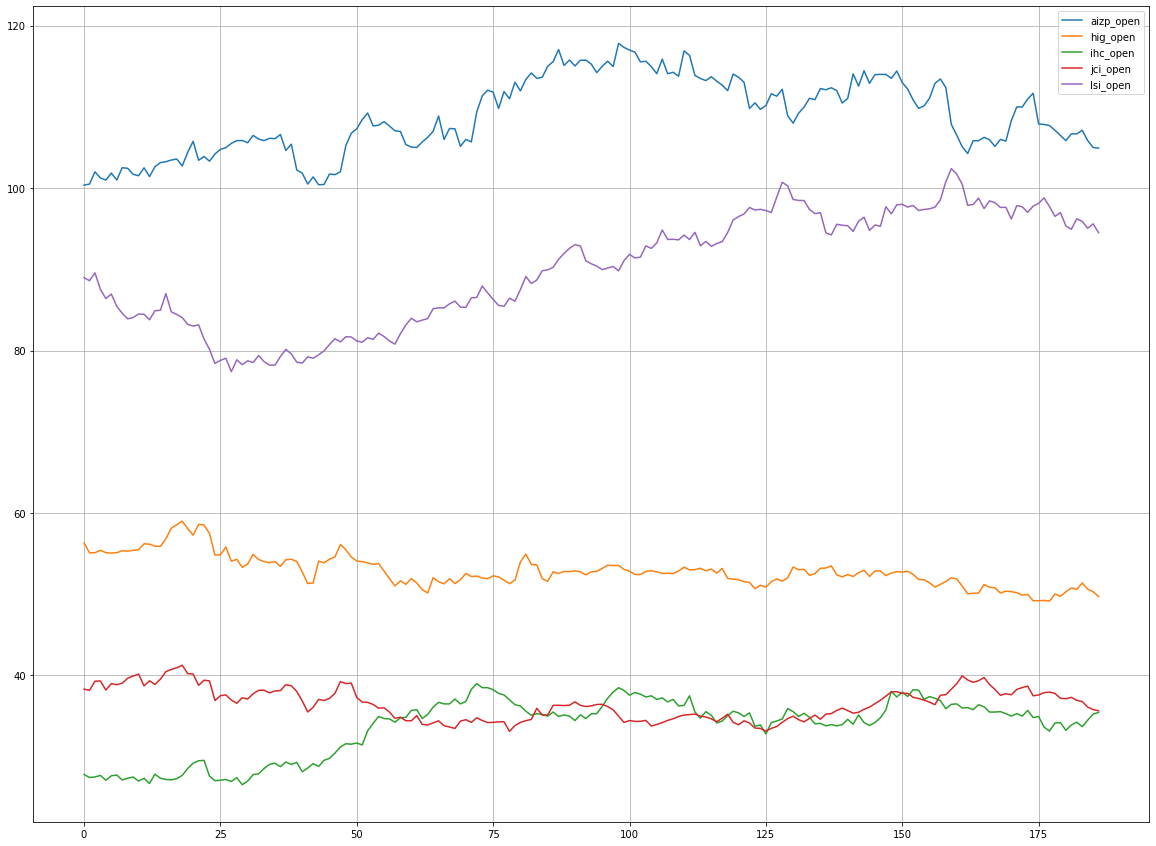

In [22]:
plot_frame = pd.DataFrame()
plot_frame = pd.concat([open_data["aizp_open"],
open_data["hig_open"],
open_data["ihc_open"],
open_data["jci_open"],
open_data["lsi_open"]], axis=1).plot(figsize=(20, 15), grid=True)

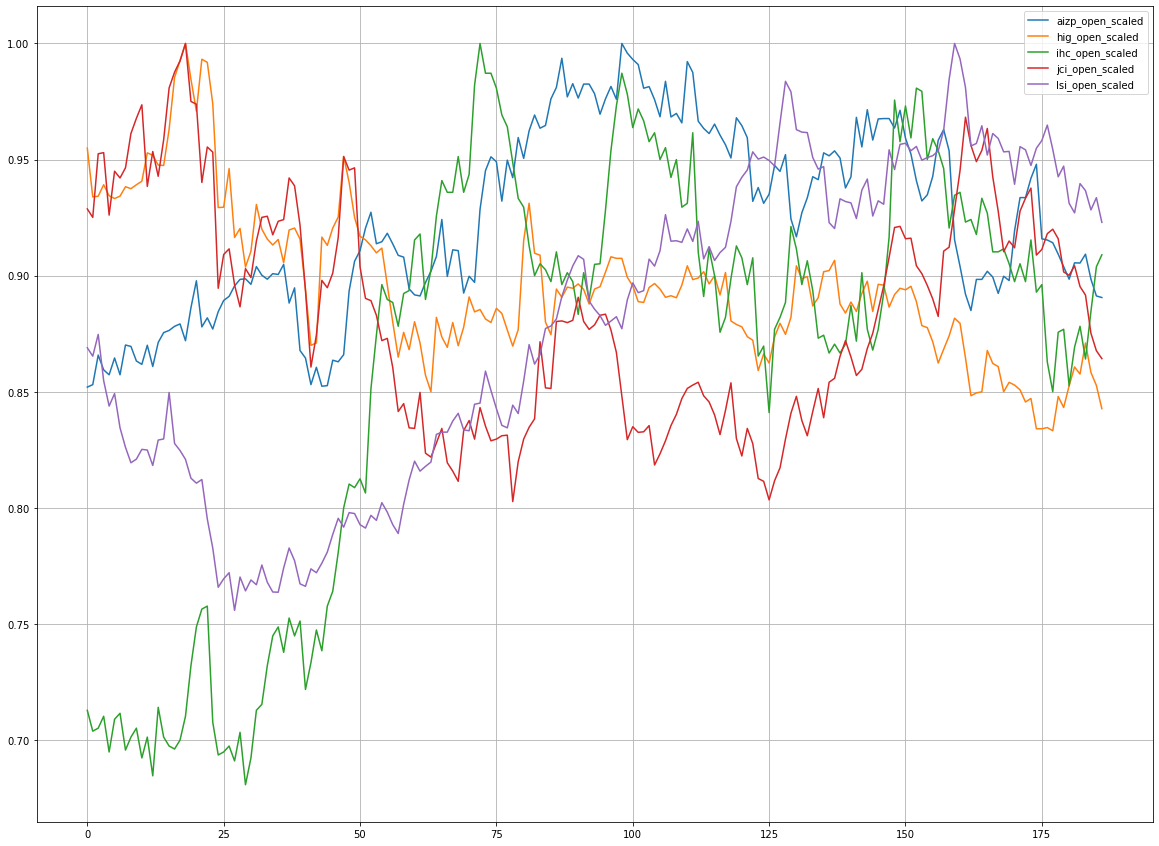

In [23]:
for col in open_data.columns:
    open_data[f"{col}_scaled"] = open_data[col] / max(open_data[col])

_ = pd.concat([c[col] for col in open_data.columns if "scaled" in col], axis=1).plot(figsize=(20, 15), grid=True)

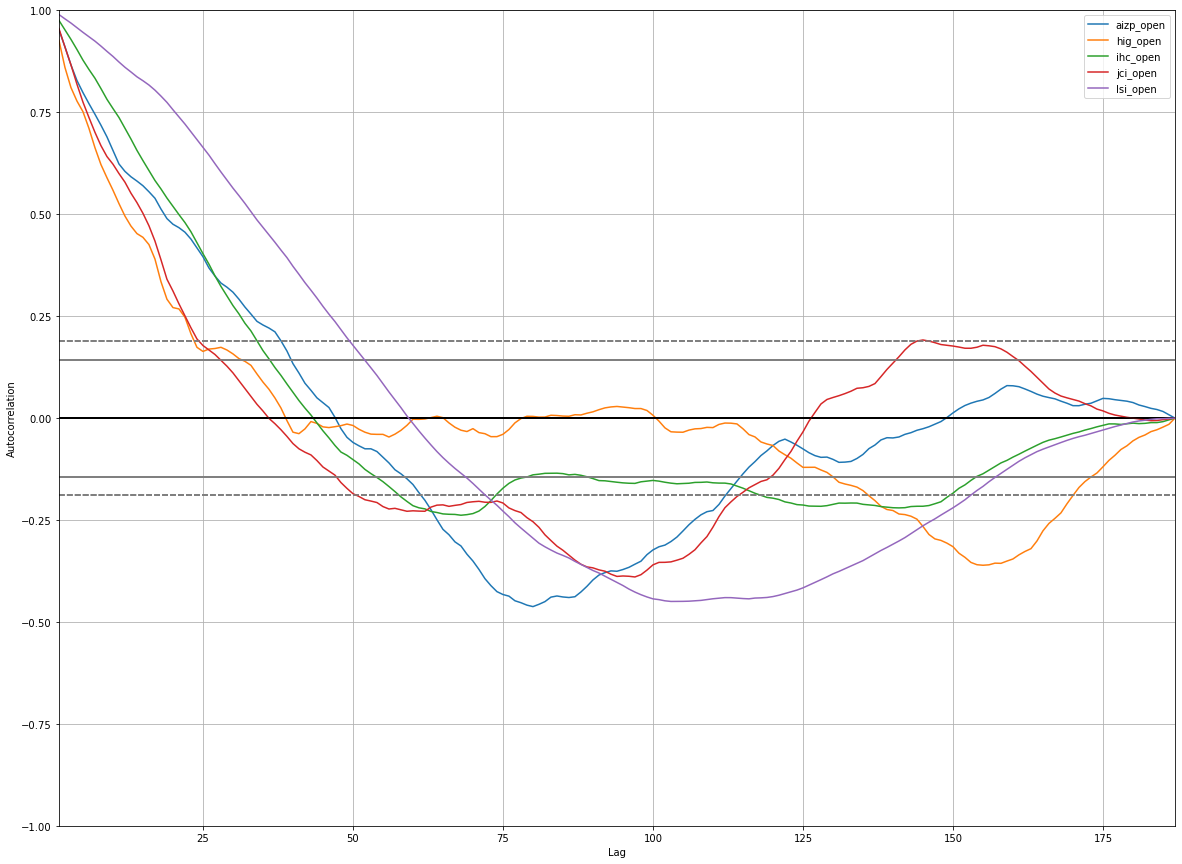

In [27]:
from pandas.plotting import autocorrelation_plot

fig = plot.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(open_data['aizp_open'], label='aizp_open')
_ = autocorrelation_plot(open_data['hig_open'], label='hig_open')
_ = autocorrelation_plot(open_data['ihc_open'], label='ihc_open')
_ = autocorrelation_plot(open_data['jci_open'], label='jci_open')
_ = autocorrelation_plot(open_data['lsi_open'], label='lsi_open')

_ = plot.legend(loc='upper right')

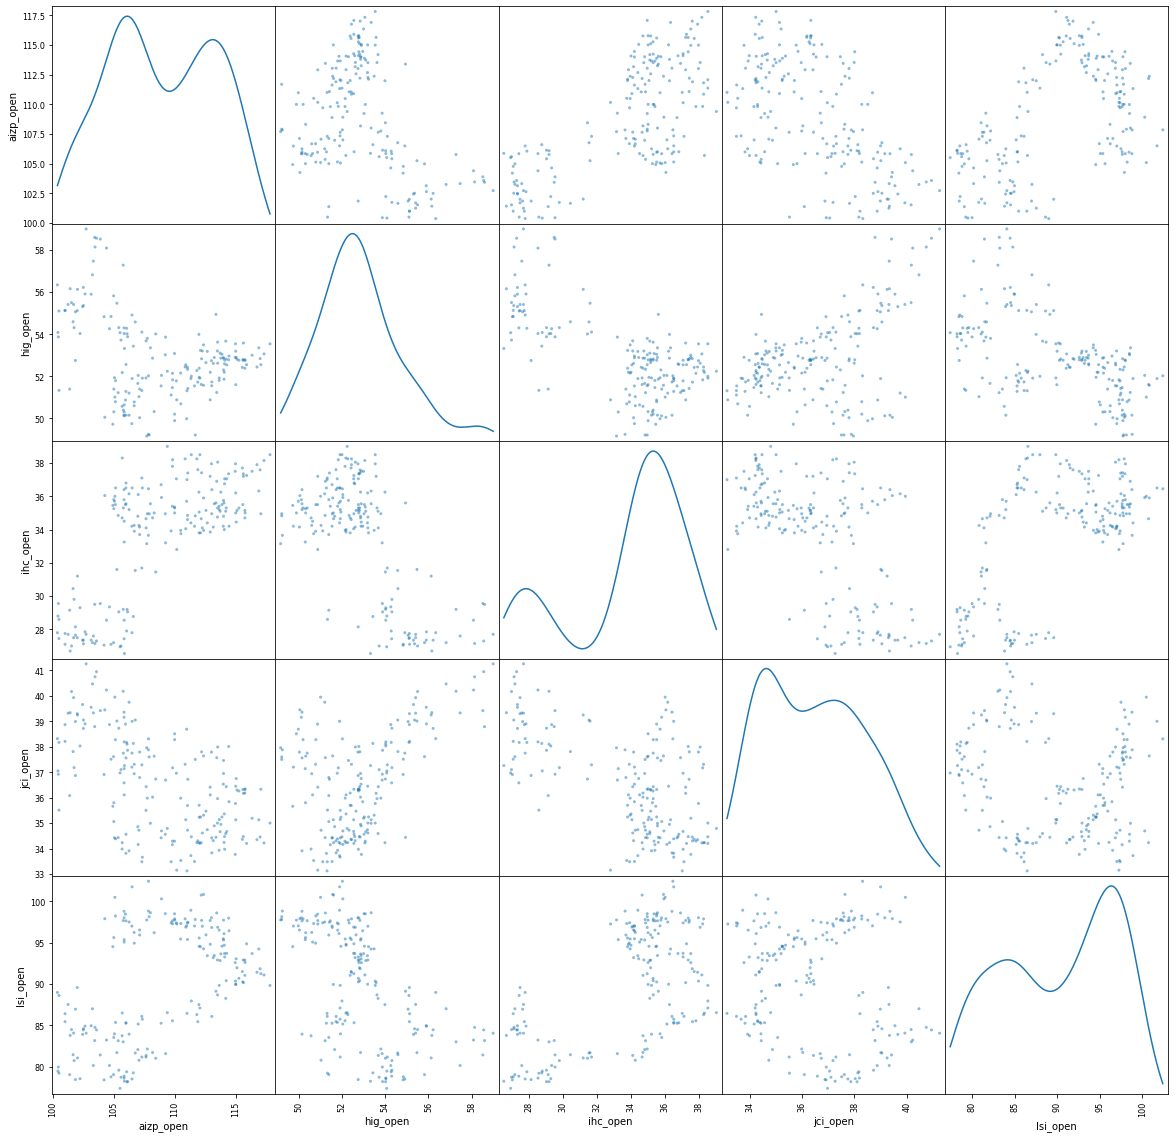

In [34]:
from pandas.plotting import scatter_matrix

plot_frame = pd.concat([open_data["aizp_open"],
open_data["hig_open"],
open_data["ihc_open"],
open_data["jci_open"],
open_data["lsi_open"]], axis=1)
_ = scatter_matrix(plot_frame, figsize=(20, 20), diagonal='kde')

In [37]:
open_cols = ["aizp_open", "hig_open", "ihc_open", "jci_open", "lsi_open"]

log_return = pd.DataFrame()
for col in open_cols:
    log_return[f"{col}_log"] = np.log(open_data[col]/open_data[col].shift())

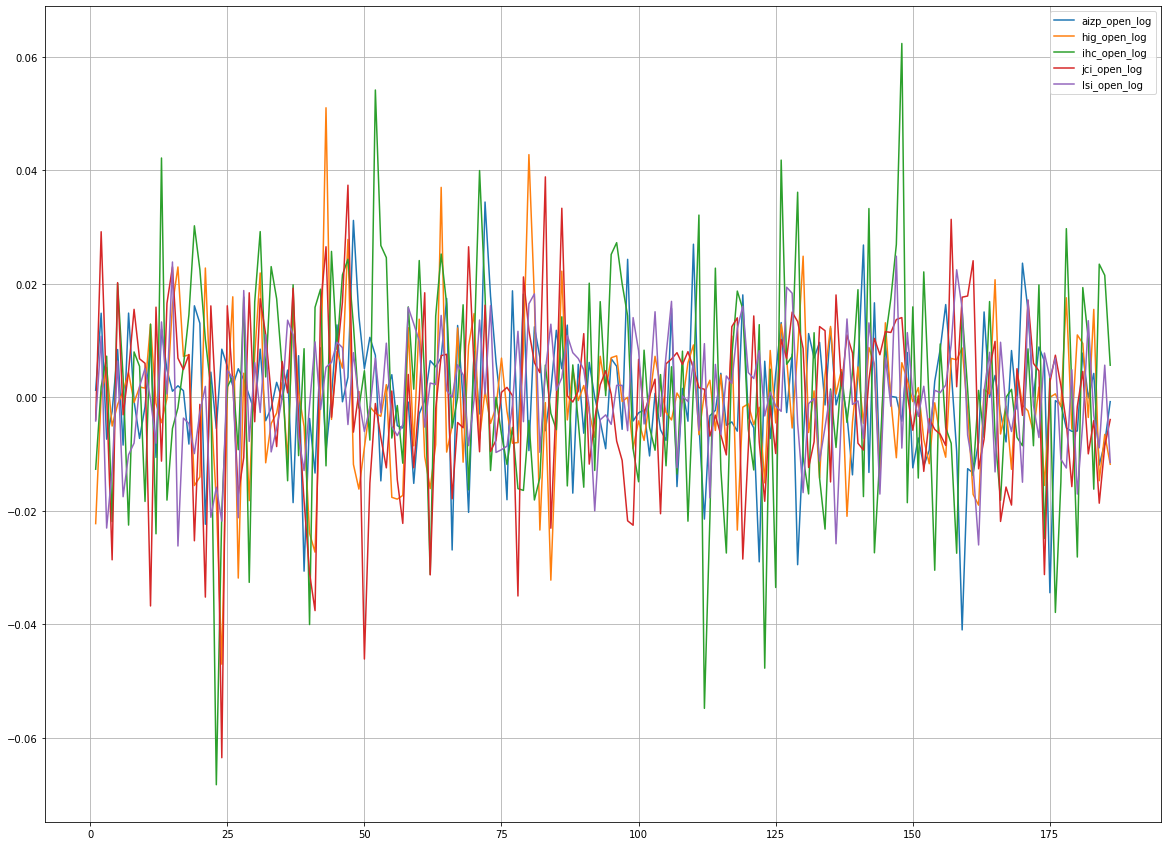

In [42]:
_ = pd.concat([log_return[col] for col in log_return.columns], axis=1).plot(figsize=(20, 15), grid=True)

Index(['aizp_open_log', 'hig_open_log', 'ihc_open_log', 'jci_open_log',
       'lsi_open_log'],
      dtype='object')


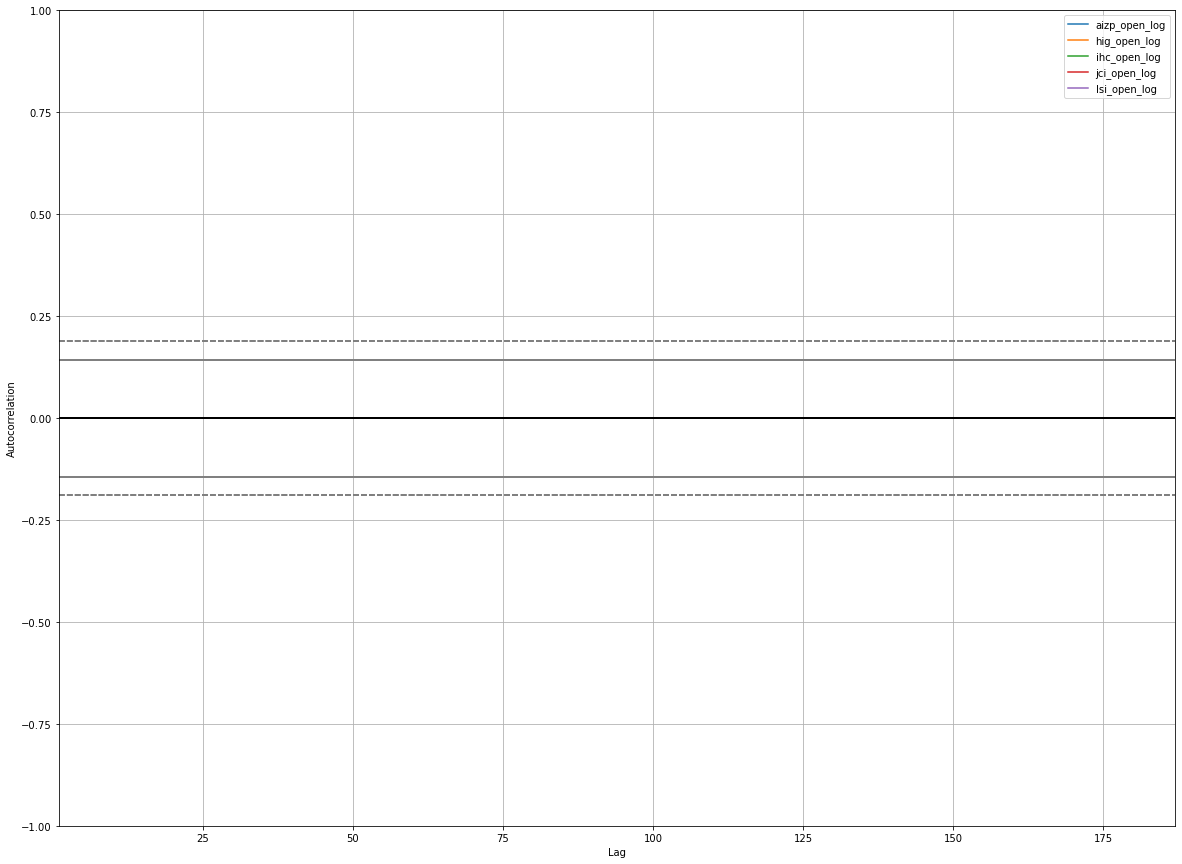

In [47]:
print(log_return.columns)

fig = plot.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(log_return['aizp_open_log'], label='aizp_open_log')
_ = autocorrelation_plot(log_return['hig_open_log'], label='hig_open_log')
_ = autocorrelation_plot(log_return['ihc_open_log'], label='ihc_open_log')
_ = autocorrelation_plot(log_return['jci_open_log'], label='jci_open_log')
_ = autocorrelation_plot(log_return['lsi_open_log'], label='lsi_open_log')

_ = plot.legend(loc='upper right')

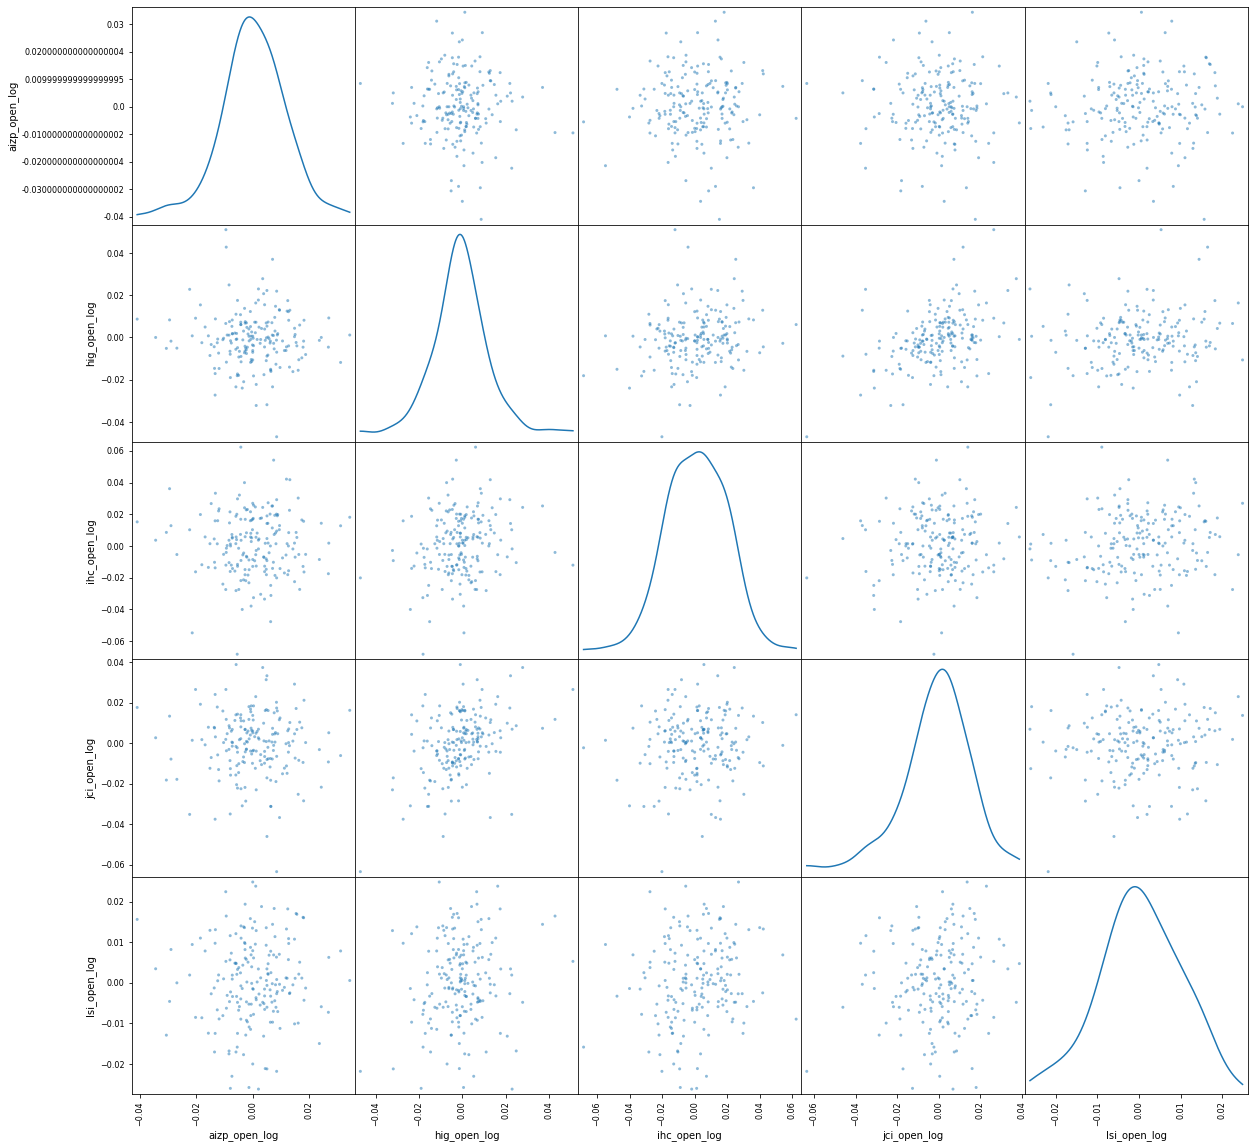

In [49]:
_ = scatter_matrix(log_return, figsize=(20, 20), diagonal='kde')

In [54]:
tmp = pd.DataFrame()
print(log_return.columns)
tmp['aizp'] = log_return['aizp_open_log']
tmp['hig'] = log_return['hig_open_log']
tmp['ihc'] = log_return['ihc_open_log']
tmp['jci'] = log_return['jci_open_log']
tmp['lsi'] = log_return['lsi_open_log']

tmp.corr()

Index(['aizp_open_log', 'hig_open_log', 'ihc_open_log', 'jci_open_log',
       'lsi_open_log'],
      dtype='object')


,aizp,hig,ihc,jci,lsi
aizp,1.000000,-0.051104,0.006735,-0.026775,0.044959
hig,-0.051104,1.000000,0.190345,0.427606,0.144833
ihc,0.006735,0.190345,1.000000,0.081396,0.157179
jci,-0.026775,0.427606,0.081396,1.000000,0.085088
lsi,0.044959,0.144833,0.157179,0.085088,1.000000
